<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame , Series
import scipy
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
players_df = pd.read_csv("Players.csv")
player_data = pd.read_csv("player_data.csv")
seasons_stat_df = pd.read_csv("Seasons_Stats.csv")

**Data Visualisation**

In [ ]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [ ]:
player_data.dtypes

name           object
year_start      int64
year_end        int64
position       object
height         object
weight        float64
birth_date     object
college        object
dtype: object

In [ ]:
player_data.isnull().values.any()
player_data.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [ ]:
cols = ['position','height', 'birth_date','college', "weight"]
player_data[cols]=player_data[cols].fillna(player_data.mode().iloc[0])


In [ ]:
player_data.isnull().values.any()

False

In [ ]:
def feet_to_cm(feet_value):
  return round(feet_value * 30.48,0)

In [ ]:
#Convert height to Float(cm) after getting rid of symbol 
player_data['height_float']= player_data['height'].str.replace("-",".").apply(pd.to_numeric,errors='coerce').apply(feet_to_cm)

player_data['height_float']

0       186.0
1       210.0
2       219.0
3       186.0
4       201.0
        ...  
4545    186.0
4546    216.0
4547    186.0
4548    216.0
4549    192.0
Name: height_float, Length: 4550, dtype: float64

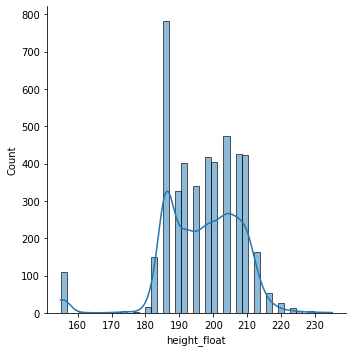

In [ ]:
plt.rcParams['figure.figsize']=[10,8]
sns.displot(player_data['height_float'],kde=True)
plt.show()

The distribution is not normal. There are outliers and asymmetries

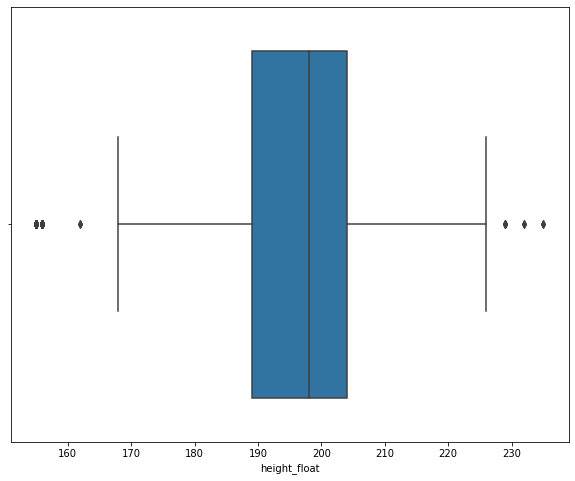

In [ ]:
sns.boxplot(x=player_data['height_float'])
plt.show()

The median is distributed in the middle 190-200 cm. The lower quantile is larger than the upper one. There are outliers on the sides

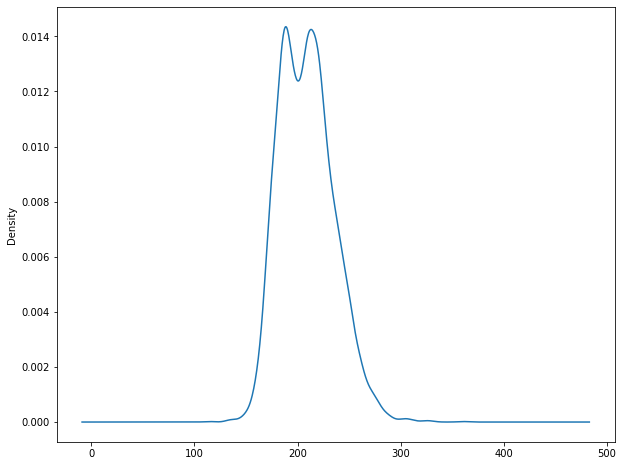

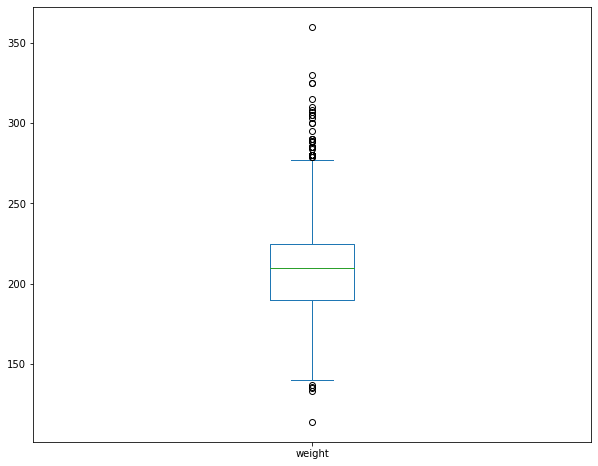

In [ ]:
player_data['weight'].plot(kind='kde')

plt.show()

player_data['weight'].plot(kind='box')
plt.show()

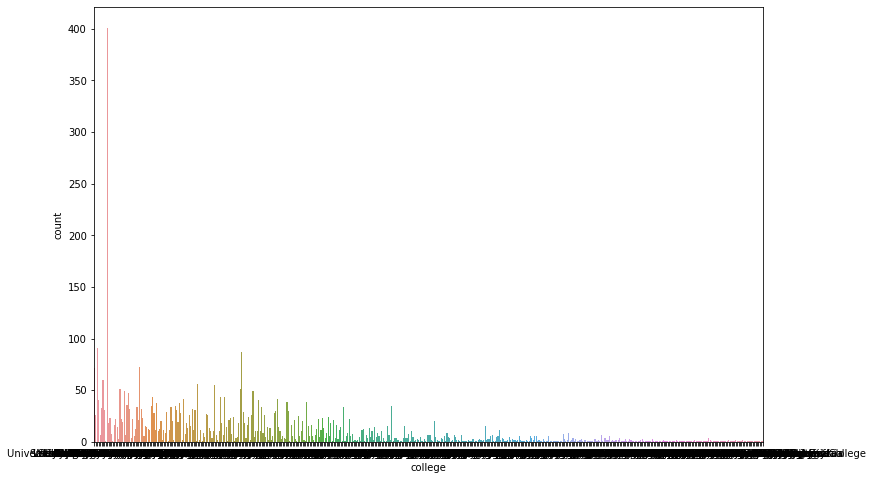

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=player_data['college'])

Show count of college

<ipython-input-14-df859f6fc645>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(player_data.corr(),annot=True)


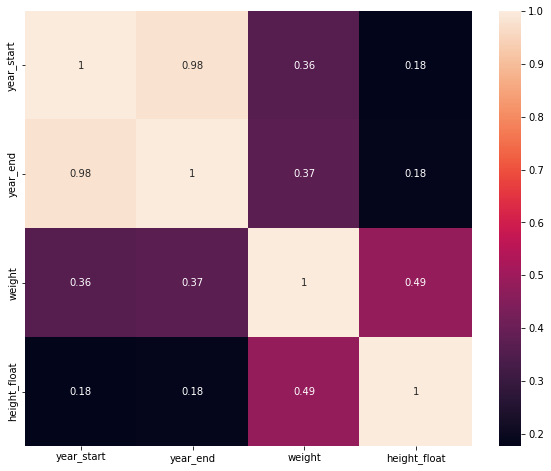

In [ ]:
sns.heatmap(player_data.corr(),annot=True)
plt.show()

There is a fairly high correlation between career start year and graduation year (which is more likely to be explained by the passage of time). There is also a correlation between weight and height.


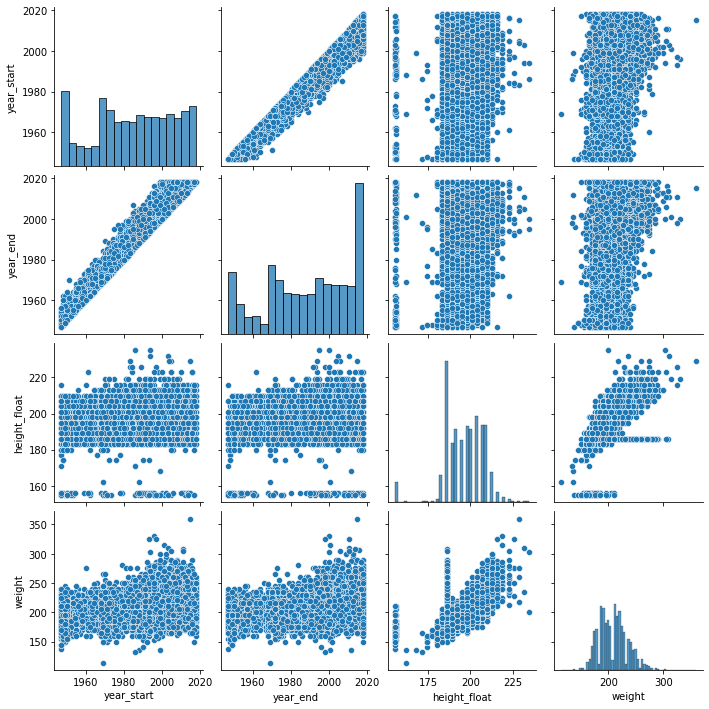

In [ ]:
sns.pairplot(player_data[['year_start','year_end','height_float','weight']],diag_kind="hist")
plt.show()

Class distribution was not found. The date is randomly distributed

In [ ]:
pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import featuretools as ft
from woodwork.logical_types import Categorical


In [ ]:
es = ft.EntitySet(id = 'players')

In [ ]:
players_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [ ]:
players_df.isna().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [ ]:
players_df['Player'].fillna("Uknown", inplace = True)
players_df.isna().sum()

Unnamed: 0       0
Player           0
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [ ]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,height_float
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,186.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,210.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",219.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,186.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,201.0


In [ ]:
player_data['name'].value_counts()

George Johnson      3
Charles Jones       3
Charles Smith       3
Cedric Henderson    2
David Lee           2
                   ..
Si Green            1
Sidney Green        1
Steve Green         1
Taurean Green       1
Matt Zunic          1
Name: name, Length: 4500, dtype: int64

In [ ]:
seasons_stat_df = pd.read_csv("Seasons_Stats.csv", usecols = ['Year','Player', 'Pos', 'Age', 'Tm'])
seasons_stat_df.head()

,Year,Player,Pos,Age,Tm
0,1950.0,Curly Armstrong,G-F,31.0,FTW
1,1950.0,Cliff Barker,SG,29.0,INO
2,1950.0,Leo Barnhorst,SF,25.0,CHS
3,1950.0,Ed Bartels,F,24.0,TOT
4,1950.0,Ed Bartels,F,24.0,DNN


,player_id,Year,Player,Pos,Age,Tm


In [ ]:
player_data.drop_duplicates(keep='first')

,name,year_start,year_end,position,height,weight,birth_date,college,height_float
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,186.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,210.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",219.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,186.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,201.0
...,...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",University of Kentucky,186.0
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,216.0
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University,186.0
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",University of Kentucky,216.0


In [ ]:
player_data['union_player_info'] =  player_data['name']+ " "+ player_data["year_start"].map(str) + "-" + player_data["year_end"].map(str) + "/ "+player_data['birth_date']


In [ ]:
player_data[player_data['name'] == 'Tony Mitchell']

,name,year_start,year_end,position,height,weight,birth_date,college,height_float,union_player_info
2786,Tony Mitchell,2014,2014,F,6-6,216.0,"August 7, 1989",University of Alabama,201.0,"Tony Mitchell 2014-2014/ August 7, 1989"
2787,Tony Mitchell,2014,2014,F,6-8,235.0,"April 7, 1992",University of North Texas,207.0,"Tony Mitchell 2014-2014/ April 7, 1992"


In [ ]:
player_data['union_player_info'].value_counts()

Alaa Abdelnaby 1991-1995/ June 24, 1968         1
Semi Ojeleye 2018-2018/ December 5, 1994        1
Mark Olberding 1976-1987/ April 21, 1956        1
Hakeem Olajuwon 1985-2002/ January 21, 1963     1
Victor Oladipo 2014-2018/ May 4, 1992           1
                                               ..
Willie Green 2004-2015/ July 28, 1981           1
Donte Greene 2009-2012/ February 21, 1988       1
Orien Greene 2006-2011/ February 4, 1982        1
Jerry Greenspan 1964-1965/ November 22, 1941    1
Matt Zunic 1949-1949/ December 19, 1919         1
Name: union_player_info, Length: 4550, dtype: int64

In [ ]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,height_float,union_player_info
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,186.0,"Alaa Abdelnaby 1991-1995/ June 24, 1968"
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,210.0,"Zaid Abdul-Aziz 1969-1978/ April 7, 1946"
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",219.0,"Kareem Abdul-Jabbar 1970-1989/ April 16, 1947"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,186.0,"Mahmoud Abdul-Rauf 1991-2001/ March 9, 1969"
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,201.0,"Tariq Abdul-Wahad 1998-2003/ November 3, 1974"


In [ ]:
stat_players

In [ ]:
es = ft.EntitySet(id = 'clients')

In [ ]:
es = es.add_dataframe(dataframe_name = 'players_df', 
                              dataframe = players_df,
                              index = 'Player')


In [ ]:
es = es.add_dataframe(dataframe_name = 'player_data', 
                              dataframe = player_data,              
                              index = 'union_player_info')

In [ ]:
es = es.add_dataframe(dataframe_name = 'season_stat', 
                              dataframe = seasons_stat_df,
                              make_index = True,
                              index = 'player_id')

In [ ]:
es

Entityset: players
  DataFrames:
    season_stat [Rows: 24691, Columns: 6]
    players_df [Rows: 3922, Columns: 9]
    player_data [Rows: 4550, Columns: 10]
  Relationships:
    No relationships

In [ ]:
new_relationship = ft.Relationship(entityset=es,parent_dataframe_name='players_df',parent_column_name='Player',
                    child_dataframe_name='player_data',child_column_name='name')
es = es.add_relationship(relationship=new_relationship)

In [ ]:
stat_players_relationship = ft.Relationship(entityset=es,parent_dataframe_name='players_df',parent_column_name='Player',
                    child_dataframe_name='season_stat',child_column_name='Player')
es = es.add_relationship(relationship=stat_players_relationship)

/usr/local/lib/python3.8/dist-packages/featuretools/entityset/entityset.py:414: UserWarning: Logical type Categorical for child column Player does not match parent column Player logical type Unknown. Changing child logical type to match parent.
  warnings.warn(


In [ ]:
es

Entityset: clients
  DataFrames:
    players_df [Rows: 3922, Columns: 8]
    player_data [Rows: 4550, Columns: 10]
    season_stat [Rows: 24691, Columns: 6]
  Relationships:
    player_data.name -> players_df.Player
    season_stat.Player -> players_df.Player

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='players_df')

feature_matrix

,Unnamed: 0,height,weight,collage,born,birth_state,COUNT(player_data),MAX(player_data.height_float),MAX(player_data.weight),MAX(player_data.year_end),...,SUM(season_stat.Age),SUM(season_stat.Year),MODE(player_data.DAY(birth_date)),MODE(player_data.MONTH(birth_date)),MODE(player_data.WEEKDAY(birth_date)),MODE(player_data.YEAR(birth_date)),NUM_UNIQUE(player_data.DAY(birth_date)),NUM_UNIQUE(player_data.MONTH(birth_date)),NUM_UNIQUE(player_data.WEEKDAY(birth_date)),NUM_UNIQUE(player_data.YEAR(birth_date))
Player,,,,,,,,,,,,,,,,,,,,,
Curly Armstrong,0,180,77,Indiana University,1918,NaN,1,156.0,170.0,1951.0,...,63.0,3901.0,1,11,4,1918,1,1,1,1
Cliff Barker,1,188,83,University of Kentucky,1921,Indiana,1,189.0,185.0,1952.0,...,90.0,5853.0,15,1,5,1921,1,1,1,1
Leo Barnhorst,2,193,86,University of Notre Dame,1924,NaN,1,195.0,190.0,1954.0,...,135.0,9760.0,11,5,6,1924,1,1,1,1
Ed Bartels,3,196,88,North Carolina State University,1925,NaN,1,198.0,195.0,1951.0,...,97.0,7801.0,8,10,3,1925,1,1,1,1
Ralph Beard,4,178,79,University of Kentucky,1927,Kentucky,1,155.0,175.0,1951.0,...,45.0,3901.0,2,12,4,1927,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Troy Williams,3917,198,97,South Carolina State University,1969,South Carolina,1,204.0,218.0,2018.0,...,66.0,6051.0,30,12,4,1994,1,1,1,1
Kyle Wiltjer,3918,208,108,Gonzaga University,1992,Oregon,1,186.0,240.0,2017.0,...,24.0,2017.0,20,10,1,1992,1,1,1,1
Stephen Zimmerman,3919,213,108,"University of Nevada, Las Vegas",1996,Tennessee,1,213.0,240.0,2017.0,...,20.0,2017.0,9,9,0,1996,1,1,1,1
